Bachelor thesis - Richard Borschke - 7337876 - University of Cologne - A spatio-temporal analysis of usage patterns in free-floating shared mobility


# Clustering Trip Types

This notebook contains the identification of trip types. Following steps are performed:
* Data scaling
* ########## Clustering of trip types
* Evaluation of clustering
* Distribution of identified trip types among mobility modes

### Imports

In [1]:
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np

### Load Data

In [2]:
# load monthly data of mode based on selected months
def load_data(mode, months):
    first_read = True
    
    for month in months:
        data_month = pd.concat([pd.read_csv(file) for file in glob.glob('Data/Modes/data_supplemented_{}_{}.csv'.format(mode, month))], ignore_index = True)
        if (first_read):
            data_full = data_month
            first_read = False
        else:
            data_full = pd.concat([data_full, data_month], ignore_index=True)
    
    return data_full

# load full data of mode
def load_data_mode_full(mode):
    data_mode_full = pd.read_csv('Data/Modes/data_supplemented_full_{}.csv'.format(mode))
    
    return data_mode_full

In [3]:
# define months for data loading (YYYYMM)
months = ['201911', '201912', '202001', '202002']

#load data by months
load_monthly_data = False

if (load_monthly_data):
    data_car = load_data('car', months)
    data_bicycle = load_data('bicycle', months)
    data_scooter = load_data('scooter', months)
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [4]:
# read in desired data
# set True if full data set load is desired
load_full_data = True

if (load_full_data):
    data_car = load_data_mode_full('car')
    data_bicycle = load_data_mode_full('bicycle')
    data_scooter = load_data_mode_full('scooter')
    data_full = pd.concat([data_car, data_bicycle, data_scooter], ignore_index=True)

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404863 entries, 0 to 404862
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   404863 non-null  object 
 1   provider                             404863 non-null  object 
 2   vehicleType                          404863 non-null  object 
 3   date_start                           404863 non-null  object 
 4   time_start                           404863 non-null  int64  
 5   date_end                             404863 non-null  object 
 6   time_end                             404863 non-null  int64  
 7   year                                 404863 non-null  int64  
 8   month                                404863 non-null  int64  
 9   weekday                              404863 non-null  int64  
 10  hour                                 404863 non-null  int64  
 11  weekend      

In [6]:
d=data_full[data_full['POI_aero_end']>0]
d[d['duration']>7200].count()

id                                     745
provider                               745
vehicleType                            745
date_start                             745
time_start                             745
date_end                               745
time_end                               745
year                                   745
month                                  745
weekday                                745
hour                                   745
weekend                                745
longitude_start                        745
latitude_start                         745
longitude_end                          745
latitude_end                           745
coordinates_start                      745
coordinates_end                        745
distance                               745
duration                               745
speed                                  745
time_basket                            745
dist_center_start                      745
dist_center

### Data preparation for clustering

In [7]:
data = data_full.copy()

# binary dummies for time basket column
#dummy = pd.get_dummies(data['time_basket'])



# merge normalized df with dummy df
#data = data.merge(dummy, right_index = True, left_index = True)




# dropping features
data.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)
# time_start and weekday and weekend XOR time basketabs

#'time_start',

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

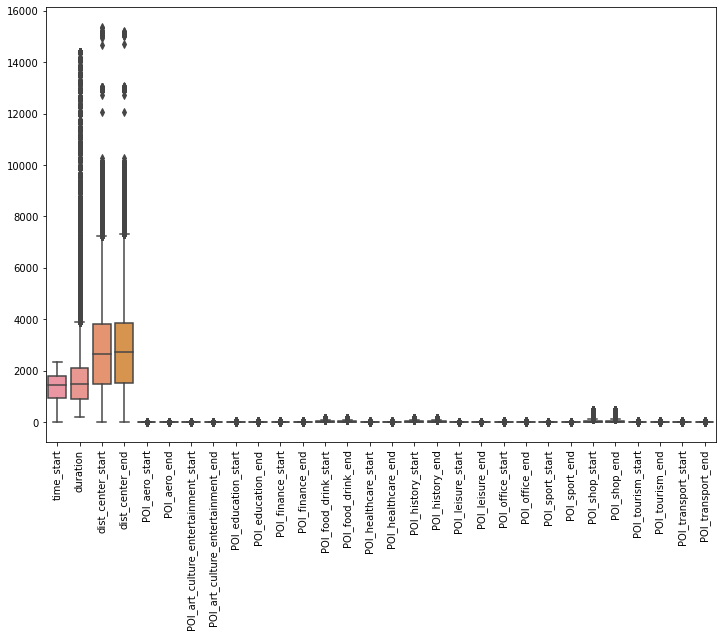

In [8]:
# 
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [9]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

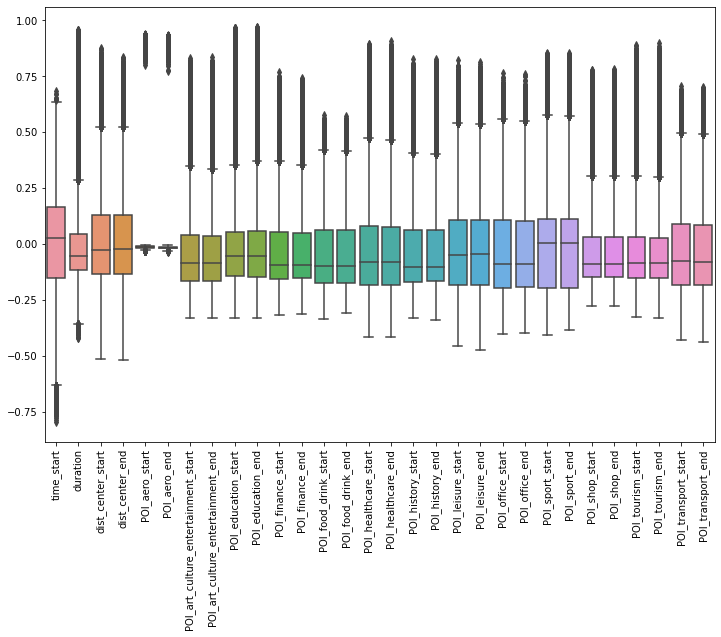

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=normalized_df)
plt.xticks(rotation=90)

### Cluster Tendency

In [10]:
X = normalized_df.copy()
X.drop(['time_start'], axis=1, inplace=True)

In [11]:
from pyclustertend import hopkins

hopkins(X,100)

0.1036481947708156

In [12]:
from pyclustertend import hopkins
#from sklearn.preprocessing import scale
#X = scale(datasets.load_iris().data)
hopkins(normalized_df,100)

0.1166433604907521

In [11]:
# merge normalized df with dummy df
#normalized_df = normalized_df.merge(dummy, right_index = True, left_index = True)
#normalized_df.info()

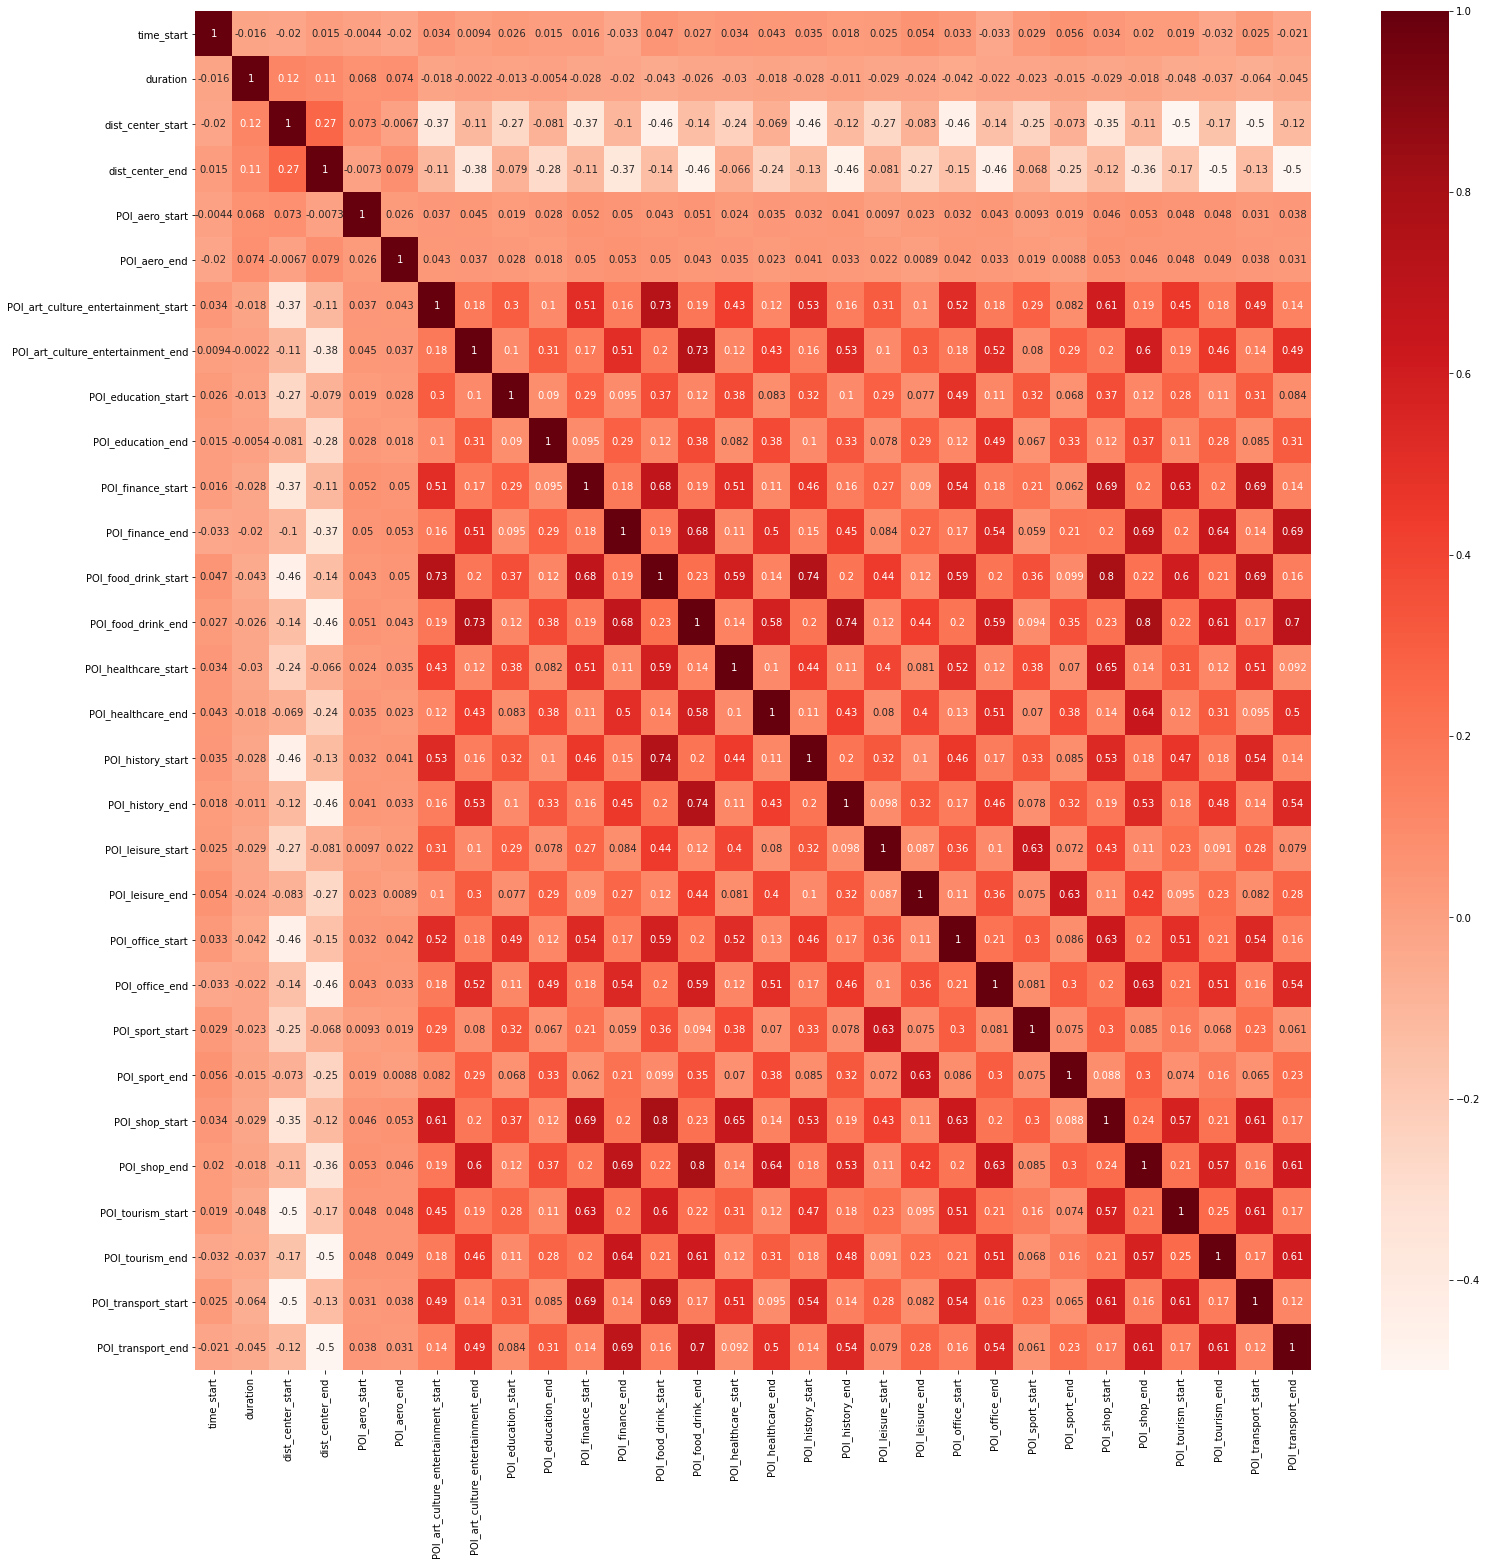

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = normalized_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
df_sample = normalized_df.sample(n=100, random_state=1)
df_sample

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_start,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end
120814,-0.549670,-0.105546,-0.143949,0.059460,-0.017582,-0.018483,-0.085784,-0.186000,-0.191035,-0.064087,...,-0.260574,-0.257366,-0.231877,-0.230498,-0.058243,-0.150742,-0.024425,-0.129625,-0.067676,-0.061979
60088,0.084054,0.111590,0.162918,-0.111421,-0.009534,-0.010023,-0.101103,0.174014,0.032827,-0.034752,...,0.131883,0.228063,-0.125740,0.265957,-0.069433,0.022377,-0.072192,0.017318,-0.120440,0.079019
46984,0.322446,0.089993,0.208252,-0.336070,-0.015529,-0.016325,-0.164673,0.104345,-0.057630,-0.056603,...,-0.230146,0.221767,0.007337,-0.203582,-0.152980,0.062254,-0.117584,-0.114489,-0.059773,0.082842
146684,-0.038120,-0.002237,-0.140291,-0.014087,-0.021525,-0.022628,-0.228259,-0.227715,-0.233879,0.081682,...,0.023633,0.099904,0.304221,0.012021,-0.156758,-0.148778,-0.162988,-0.224629,-0.019833,-0.012309
198253,0.288494,-0.041847,-0.163274,0.002332,-0.013793,-0.014500,0.406518,-0.145920,0.047491,-0.050277,...,0.146884,-0.201908,-0.181911,0.384767,-0.010261,-0.134633,-0.019162,-0.143942,0.108442,-0.170830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89686,0.164288,0.073636,-0.046065,0.000289,-0.011899,-0.012509,-0.058055,-0.057268,0.040968,-0.131896,...,0.088828,-0.097709,0.493264,0.331920,-0.028302,-0.121791,-0.126881,-0.124172,0.198058,-0.147366
81874,0.252135,0.145551,0.182367,0.050965,-0.024412,-0.025663,0.020656,-0.258252,-0.090596,0.092636,...,0.259959,-0.278900,-0.321949,-0.320034,-0.018160,-0.104979,-0.109379,-0.179978,0.048979,-0.013960
170736,-0.107872,-0.000362,0.013280,0.315907,-0.003484,0.927222,-0.036947,-0.036859,-0.037857,-0.038621,...,-0.029452,-0.051001,-0.045950,-0.045677,-0.006660,-0.032353,-0.026382,-0.015015,-0.013411,-0.043151
21393,-0.195165,0.681745,0.332369,0.412558,-0.007980,-0.008389,-0.084620,-0.038406,-0.086704,-0.088454,...,-0.118265,-0.091168,-0.105240,-0.104614,-0.080475,-0.017266,-0.085092,-0.083274,-0.077442,-0.051696


### K-means

In [16]:
#KMeans Clustering
#Defining WCSS Elbow point
from sklearn.cluster import KMeans
import time

wcss=[]
for i in range (1,30):
    start = time.time()
    kmeans = KMeans(i)
    kmeans.fit(df_sample)
    wcss.append(kmeans.inertia_)
    end = time.time()
    print(i)
    print(end - start)
wcss

1
0.03191423416137695
2
0.03889727592468262
3
0.03390860557556152
4
0.04388308525085449
5
0.053854942321777344
6
0.04388260841369629
7
0.03391122817993164
8
0.03590226173400879
9
0.0399327278137207
10
0.04089069366455078
11
0.042845964431762695
12
0.052858829498291016
13
0.051897287368774414
14
0.06379413604736328
15
0.07679557800292969
16
0.08776521682739258
17
0.07782936096191406
18
0.08972334861755371
19
0.0927889347076416
20
0.10069036483764648
21
0.1047220230102539
22
0.10871386528015137
23
0.10175848007202148
24
0.11266398429870605
25
0.07779169082641602
26
0.08676648139953613
27
0.07982277870178223
28
0.08772897720336914
29
0.1296541690826416


[97.03946217923318,
 72.10464964910616,
 65.25821619847419,
 59.5997589135242,
 55.04599646723661,
 51.77030394795732,
 48.91895059736372,
 46.743451293121424,
 44.78004443363345,
 44.17082235366445,
 42.074254913169575,
 40.41789195415224,
 39.63225287263705,
 38.744569999034326,
 36.92907867859334,
 36.35901903428818,
 35.44071878602717,
 34.414648160762034,
 33.446420908612026,
 32.70811018580435,
 31.738914981745197,
 30.402122321676455,
 29.602460571438176,
 28.403054096314637,
 28.22340338370941,
 26.73330977703057,
 25.935541116752344,
 25.048765486889987,
 25.196281615210623]

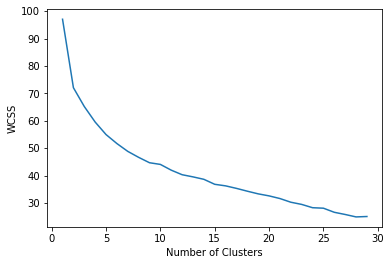

In [17]:
#Elbow Plot
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

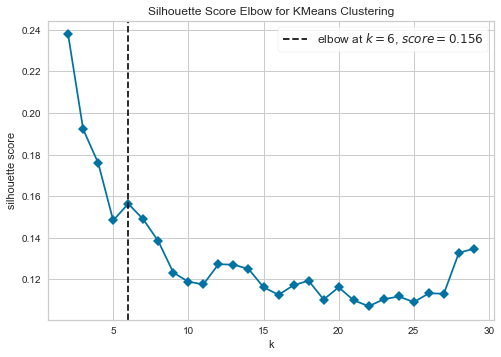

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_sample)    
visualizer.poof()

In [19]:
k = 9
k_means_new=KMeans(k)
kmeans.fit(df_sample)
cluster_new = df_sample.copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(df_sample)
cluster_new

,time_start,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,cluster_pred
90054,0.046629,-0.007729,-0.034783,-0.108066,-0.006852,-0.006998,0.005329,0.188808,0.021570,0.163917,...,0.314585,0.089611,0.003509,0.063346,0.575234,-0.008906,0.225603,0.217146,0.183971,3
34736,-0.228841,-0.022341,0.256063,0.267276,-0.018858,-0.019260,-0.085293,0.016471,-0.189020,0.193748,...,0.136802,-0.230324,0.009659,-0.180263,-0.166427,-0.078461,-0.128846,-0.271860,-0.216407,4
209618,-0.338404,0.013950,0.202792,0.527667,-0.014663,-0.014976,-0.144046,-0.143696,-0.146975,-0.049497,...,-0.198865,-0.179092,-0.178138,-0.124319,-0.142303,-0.102958,-0.141829,-0.131847,-0.208412,5
319295,-0.164903,-0.069809,-0.078790,-0.090132,-0.007233,-0.007388,0.158994,0.508135,0.022772,-0.024416,...,0.224555,0.094602,-0.087875,0.121593,0.133362,0.197534,0.032747,0.190003,0.035804,3
78917,0.027646,-0.073644,-0.387623,0.334683,-0.023164,-0.023658,0.018017,-0.103385,0.072925,-0.236282,...,-0.245269,-0.282918,0.011865,-0.031170,-0.173873,0.301240,-0.158267,0.231507,-0.202410,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59879,-0.055947,0.315477,0.062299,0.519701,-0.015642,-0.015976,-0.153662,-0.153288,-0.053771,-0.159554,...,-0.212139,-0.191046,-0.190029,-0.085285,-0.151802,-0.109831,-0.151296,-0.225499,-0.222324,5
154274,-0.200636,0.420990,-0.177496,-0.079220,-0.017336,-0.017705,-0.170297,-0.169883,-0.059592,-0.176827,...,-0.235104,0.007497,-0.210601,-0.158215,-0.164424,-0.121721,-0.167675,-0.014819,-0.246392,5
354365,0.077328,-0.092183,-0.106403,-0.088626,-0.009421,-0.009621,0.506682,0.209322,0.029657,0.096787,...,0.068340,0.242340,-0.114446,0.221481,0.024562,-0.039195,0.122910,0.170803,0.020840,3
58707,0.427598,-0.109164,-0.042664,0.055770,-0.019599,-0.020017,-0.192532,-0.192064,-0.067373,-0.199915,...,-0.149236,0.008476,-0.238098,-0.056026,-0.168657,-0.081544,0.311368,0.142718,0.097011,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'time_start'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'dist_center_start'),
  Text(3, 0, 'dist_center_end'),
  Text(4, 0, 'POI_aero_start'),
  Text(5, 0, 'POI_aero_end'),
  Text(6, 0, 'POI_art_culture_entertainment_start'),
  Text(7, 0, 'POI_art_culture_entertainment_end'),
  Text(8, 0, 'POI_education_start'),
  Text(9, 0, 'POI_education_end'),
  Text(10, 0, 'POI_finance_start'),
  Text(11, 0, 'POI_finance_end'),
  Text(12, 0, 'POI_food_drink_start'),
  Text(13, 0, 'POI_food_drink_end'),
  Text(14, 0, 'POI_healthcare_start'),
  Text(15, 0, 'POI_healthcare_end'),
  Text(16, 0, 'POI_history_start'),
  Text(17, 0, 'POI_history_end'),
  Text(18, 0, 'POI_leisure_start'),
  Text(19, 0, 'POI_leisure_end'),
  Text(20, 0, 'POI_office_start'),
  Text(21, 0, 'POI_office_end'),
  Text(22, 0, 'POI_sport_start'),
  Text(23, 0, 'POI_sport_end'),
  Text

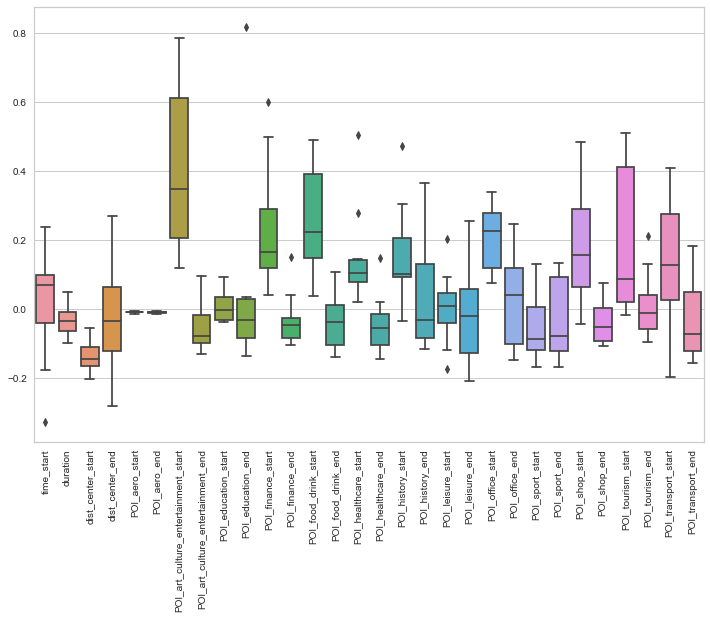

In [20]:
cluster = cluster_new[cluster_new['cluster_pred']==1].copy()
cluster = cluster.drop(['cluster_pred'], axis = 1)
plt.figure(figsize=(12,8))
sns.boxplot(data=cluster)
plt.xticks(rotation=90)

### K-prototypes

In [14]:
data_proto = data_full.copy()
data_basket = data_proto['time_basket'].copy()

# dropping features
data_proto.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start', 'time_basket',
           'weekday', 'weekend'], axis=1, inplace=True)
data_proto.columns

Index(['duration', 'dist_center_start', 'dist_center_end', 'POI_aero_start',
       'POI_aero_end', 'POI_art_culture_entertainment_start',
       'POI_art_culture_entertainment_end', 'POI_education_start',
       'POI_education_end', 'POI_finance_start', 'POI_finance_end',
       'POI_food_drink_start', 'POI_food_drink_end', 'POI_healthcare_start',
       'POI_healthcare_end', 'POI_history_start', 'POI_history_end',
       'POI_leisure_start', 'POI_leisure_end', 'POI_office_start',
       'POI_office_end', 'POI_sport_start', 'POI_sport_end', 'POI_shop_start',
       'POI_shop_end', 'POI_tourism_start', 'POI_tourism_end',
       'POI_transport_start', 'POI_transport_end'],
      dtype='object')

In [22]:
#Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# Get column names
names = data_proto.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_data = scaler.fit_transform(data_proto)
scaled_data = pd.DataFrame(scaled_data, columns=names)
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data,columns=names) 

In [23]:
normalized_data = normalized_data.merge(data_basket, right_index = True, left_index = True)

In [24]:
#type(full_d)

#full_data.info()

In [85]:
import plotly.graph_objects as go

#OPTIONAL: Elbow plot with cost (will take a LONG time)
costs = []
n_clusters = []
clusters_assigned = []

#for i in tqdm(range(2, 25)):
for i in range(2, 12):

    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', n_init=3, verbose=2, n_jobs=-1)
        clusters = kproto.fit_predict(kprot_data, categorical=[1])
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        
        
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
fig.show()

Best run was number 1
Best run was number 3
Best run was number 1
Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 1
Best run was number 2
Best run was number 3
Best run was number 2


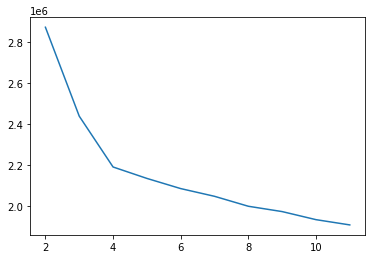

In [86]:
plt.plot(n_clusters, costs)

C:\Users\User_Vratar\Anaconda3\lib\site-packages\umap\umap_.py:1530: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



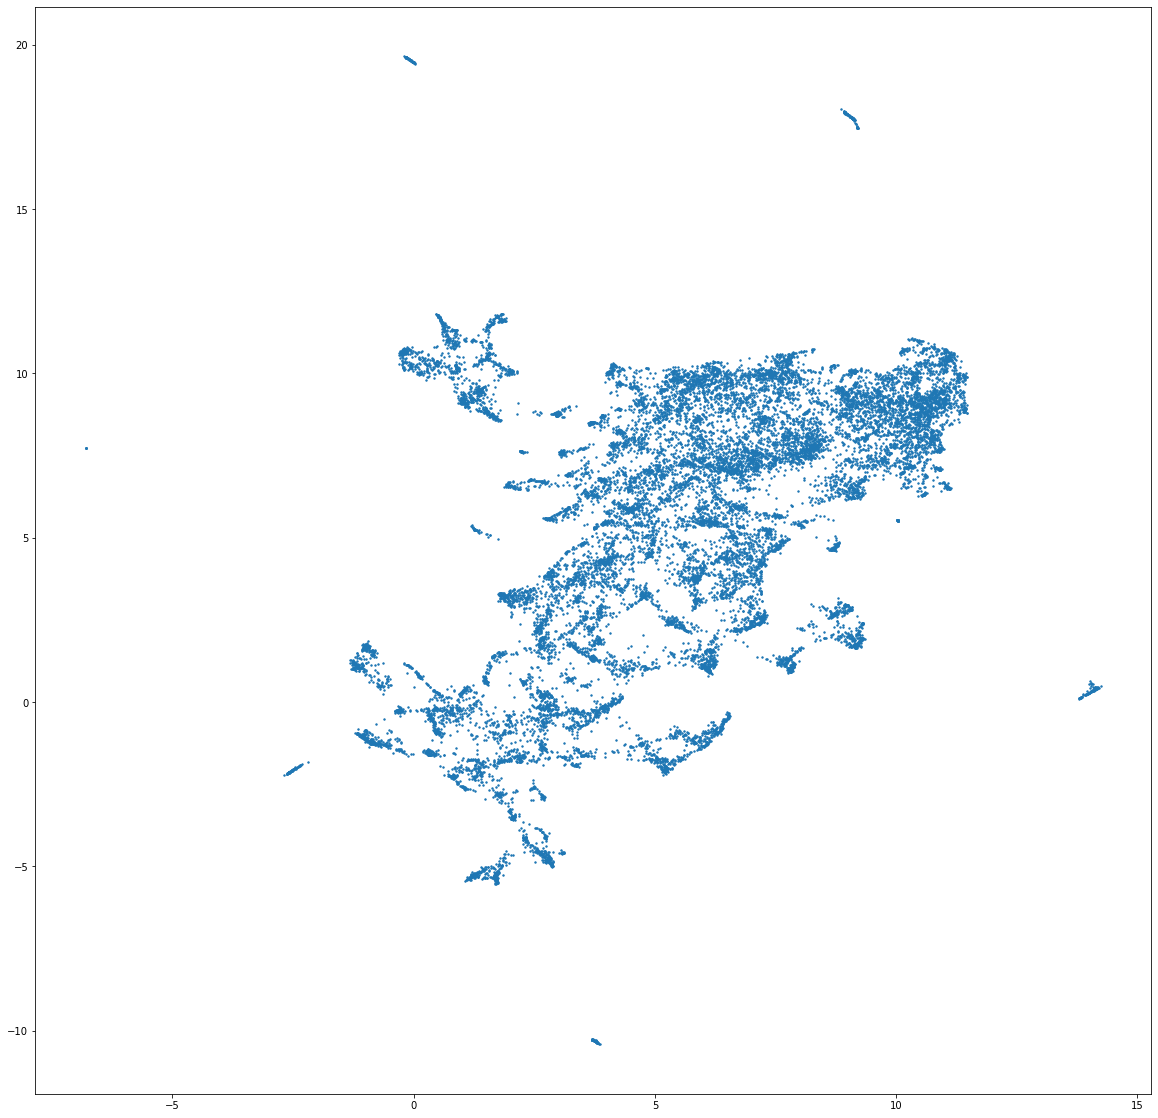

In [83]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import umap
full_data1 = data_full.copy()
full_data2 = full_data1.drop(['id', 'provider', 'vehicleType', 'date_start', 'date_end', 'time_end', 'year', 'month', 'hour', 
           'longitude_start', 'longitude_end', 'latitude_start', 'latitude_end', 'coordinates_start', 'coordinates_end', 
           'distance', 'speed', 'time_start',
           'weekday', 'weekend'], axis=1)
full_data = full_data2.sample(n=20000, random_state=1).copy()


#Preprocessing numerical
numerical = full_data.select_dtypes(exclude='object').copy()

#for c in numerical.columns:
 #   pt = PowerTransformer()
  #  numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
##############################################################################  
#from sklearn.preprocessing import QuantileTransformer
#for c in numerical.columns:
 #   qt = QuantileTransformer(output_distribution='normal', random_state=0)
  #  numerical.loc[:, c] = qt.fit_transform(np.array(numerical[c]).reshape(-1, 1))


#d_quant = pd.DataFrame(numerical, columns=names)
##############################################################################
from sklearn.preprocessing import MinMaxScaler
for c in numerical.columns:
    mm = MinMaxScaler()
    numerical.loc[:, c] = mm.fit_transform(np.array(numerical[c]).reshape(-1, 1))
##############################################################################
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)

plt.figure(figsize=(20, 20))
plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [84]:
#d_quant.std()
#full_data.head()

In [87]:
kprot_data = full_data.copy()
from kmodes.kprototypes import KPrototypes
#Pre-processing
#for c in full_data.select_dtypes(exclude='object').columns:
 #   pt = PowerTransformer()
  #  kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))
    
##############################################################################  
#from sklearn.preprocessing import QuantileTransformer

#for c in full_data.select_dtypes(exclude='object').columns:
 #   qt = QuantileTransformer(output_distribution='normal', random_state=0)
  #  kprot_data[c] = qt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

##############################################################################
from sklearn.preprocessing import MinMaxScaler
for c in full_data.select_dtypes(exclude='object').columns:
    mm = MinMaxScaler()
    kprot_data[c] = mm.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))
##############################################################################

categorical_columns = [1] #make sure to specify correct indices

#Actual clustering
kproto = KPrototypes(n_clusters= 4, init='Cao', verbose=2, n_jobs=-1)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

#Prints the count of each cluster group
pd.Series(clusters).value_counts()



Best run was number 9


1    11187
3     3673
2     3625
0     1515
dtype: int64

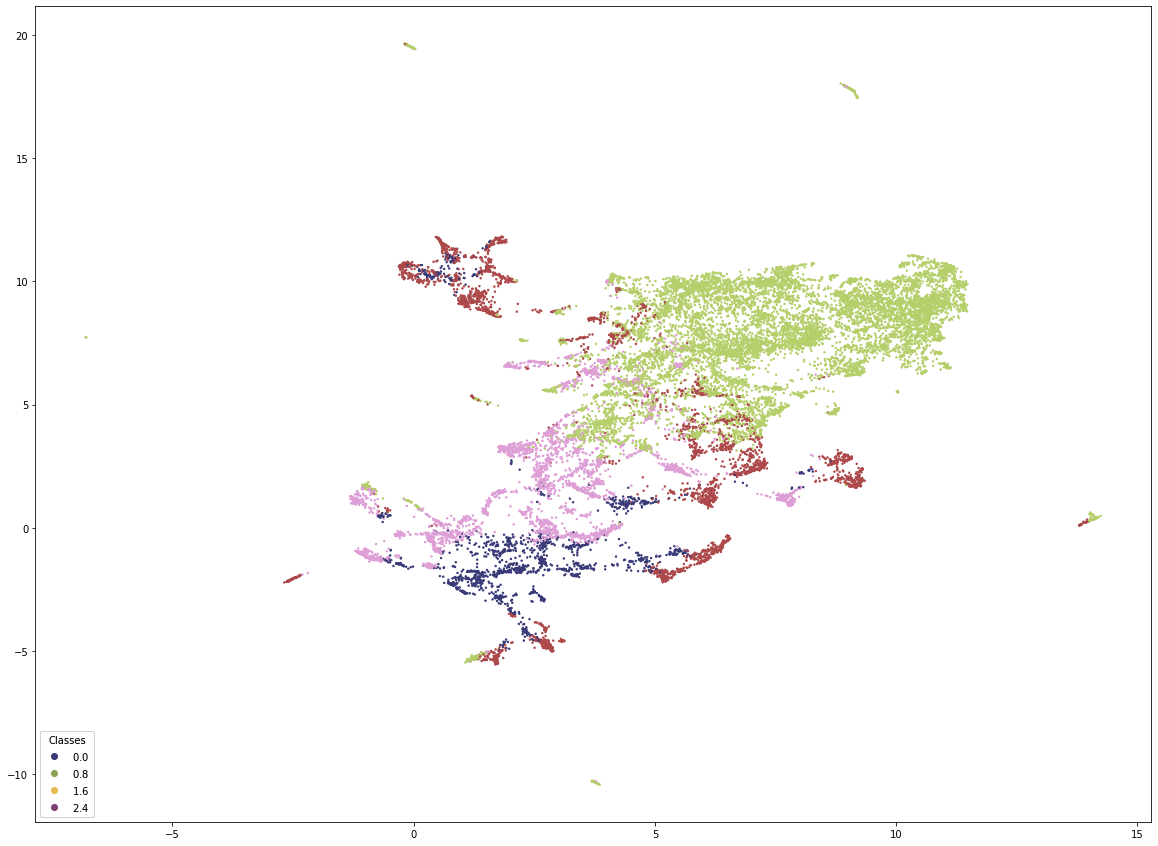

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 15))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [95]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)
cluster_dict

[1,
 3,
 3,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 0,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 0,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 0,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 0,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 1,


In [96]:
full_data['cluster']=cluster_dict
full_data

,duration,time_basket,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,...,POI_office_end,POI_sport_start,POI_sport_end,POI_shop_start,POI_shop_end,POI_tourism_start,POI_tourism_end,POI_transport_start,POI_transport_end,cluster
120814,1200.0,weekday_nighttime,1986,3290,0,0,1,0,0,1,...,0,0,0,31,8,3,1,4,4,1
60088,3001.0,evening_peak_time,4756,1625,0,0,0,5,2,1,...,12,0,3,14,54,1,4,1,8,3
46984,2400.0,weekend_evening,4353,525,0,0,0,3,1,1,...,9,1,0,3,61,1,1,4,7,3
146684,1800.0,weekday_daytime,2169,2844,0,0,0,0,0,2,...,6,2,1,14,15,1,0,5,5,1
198253,1502.0,weekend_evening,1586,2935,0,0,7,0,2,1,...,0,0,3,42,3,3,0,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141858,905.0,evening_peak_time,636,4075,0,0,5,0,6,0,...,0,0,1,109,5,11,0,18,0,2
149162,2999.0,morning_peak_time,1250,4311,0,0,1,0,3,1,...,0,2,1,84,1,4,0,14,1,2
355553,2401.0,weekend_evening,846,916,0,0,1,2,1,2,...,3,2,0,92,38,10,9,11,9,2
335138,689.0,weekday_evening,924,1255,0,0,1,0,1,1,...,1,2,1,94,13,11,0,13,2,2


In [97]:
full_data[full_data['cluster']==3].mean()
#full_data.std()

duration                               1813.881296
dist_center_start                      3013.829839
dist_center_end                        1495.768309
POI_aero_start                            0.003812
POI_aero_end                              0.000000
POI_art_culture_entertainment_start       0.935475
POI_art_culture_entertainment_end         4.496325
POI_education_start                       1.355568
POI_education_end                         2.446229
POI_finance_start                         1.135856
POI_finance_end                           7.171794
POI_food_drink_start                     12.405935
POI_food_drink_end                       61.756874
POI_healthcare_start                      2.119521
POI_healthcare_end                        7.425538
POI_history_start                        12.008984
POI_history_end                          49.469099
POI_leisure_start                         1.978492
POI_leisure_end                           4.011707
POI_office_start               

In [98]:
cols = ['duration',
 'dist_center_start',
 'dist_center_end',
 'POI_aero_start',
 'POI_aero_end',
 'POI_art_culture_entertainment_start',
 'POI_art_culture_entertainment_end',
 'POI_education_start',
 'POI_education_end',
 'POI_finance_start',
 'POI_finance_end',
 'POI_food_drink_start',
 'POI_food_drink_end',
 'POI_healthcare_start',
 'POI_healthcare_end',
 'POI_history_start',
 'POI_history_end',
 'POI_leisure_start',
 'POI_leisure_end',
 'POI_office_start',
 'POI_office_end',
 'POI_sport_start',
 'POI_sport_end',
 'POI_shop_start',
 'POI_shop_end',
 'POI_tourism_start',
 'POI_tourism_end',
 'POI_transport_start',
'POI_transport_end',
 'time_basket',
 'cluster']
full_data = full_data[cols]

In [100]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
number_of_clusters = 4

cat = full_data.join(pd.get_dummies(full_data['time_basket']))
cat_features = cat.iloc[:,30:].groupby(by=["cluster"]).sum().copy()

poi_features = full_data.iloc[:,3:29].copy()
for column in poi_features.columns:
    poi_features.loc[poi_features[column] > 0, column] = 1

poi_features['cluster'] = cluster_dict
poi_features = poi_features.groupby(by=["cluster"]).sum()
poi_features.columns = [str(col) + '_(%)' for col in poi_features.columns]


x = pd.Series(clusters).value_counts().sort_index()
for i in range(1, number_of_clusters+1):
    cat_features.iloc[i-1:i] = (cat_features.iloc[:i] / x.iloc[i-1]).round(2)
    poi_features.iloc[i-1:i] = (poi_features.iloc[:i] / x.iloc[i-1]).round(2)


#num_features = full_data.groupby(by=["cluster"]).mean().copy()
num_features = full_data.iloc[:,:3]
num_features['cluster'] = cluster_dict
num_features = num_features.groupby(by=["cluster"]).mean().copy()

cluster_features = num_features.join(cat_features)
cluster_features = cluster_features.join(poi_features)
#print_full()
cluster_features.T

cluster_features.T.to_csv(index=False)
cluster_features.T.to_excel("clusterMinMax.xlsx")  

In [76]:
x = pd.Series(clusters).value_counts().sort_index()
x.iloc[0]

2943

In [77]:
cat_features = cat.iloc[:,30:].groupby(by=["cluster"]).sum().copy()
#cat_features.iloc[1:2]

#poi_features['cluster'] = cluster_dict
#poi_features.groupby(by=["cluster"]).sum()

In [78]:
pd.Series(clusters).value_counts()

3    4272
4    3351
5    2969
1    2964
0    2943
2    2038
6    1463
dtype: int64

In [81]:
num_features = full_data.iloc[:,:10]
num_features['cluster'] = cluster_dict
num_features = num_features.groupby(by=["cluster"]).mean().copy()
num_features

,duration,dist_center_start,dist_center_end,POI_aero_start,POI_aero_end,POI_art_culture_entertainment_start,POI_art_culture_entertainment_end,POI_education_start,POI_education_end,POI_finance_start
cluster,,,,,,,,,,
0,2207.418620,4559.714577,4275.176351,0.013592,0.009514,0.187224,0.198437,0.285763,0.437649,0.215766
1,1845.359987,3181.965250,2267.196019,0.000000,0.000000,0.396424,2.428812,1.066802,2.187584,0.591768
2,2205.457802,4458.547105,2287.942100,0.016192,0.000000,0.157998,2.635427,0.260550,2.099117,0.188420
3,1426.174391,1784.969101,1879.226826,0.000000,0.000000,3.659410,3.617743,2.360253,2.354167,5.535346
4,1940.890779,1921.279618,3713.336616,0.000000,0.009848,3.691734,0.302596,2.434199,0.752014,5.184124
5,1821.538902,3171.299427,3974.057932,0.000000,0.010104,0.444931,0.253958,1.437184,0.594139,1.407208
6,1371.585783,1619.126452,1312.112098,0.000000,0.000000,3.799727,4.061517,2.348599,2.421053,5.933014
